# OpenCV

Before we jump into coding our own convolutional kernels/filters, we will introduce to a new library that will be useful to use when dealing with computer vision tasks, such as image classification: **OpenCV**

OpenCV is a computer vision and machine learning software library that includes many common image analysis algorithms that will help us build custom, intelligent computer vision applications. To start with, this includes tools that help us process images and select areas of interest. The library is widely used in academic and industrial applications; from [their site](http://opencv.org/about.html), OpenCV includes an impressive list of users. 

## Creating a Filter, Edge Detection

### Import resources and display image

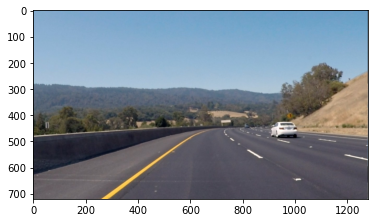

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('assets/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

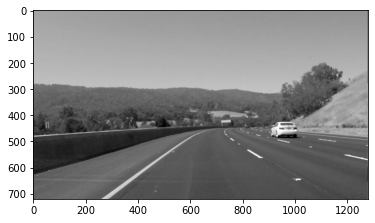

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="assets/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

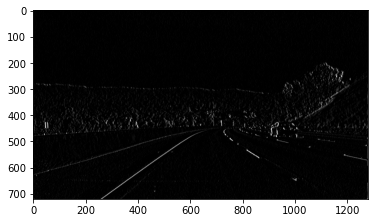

In [11]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images.



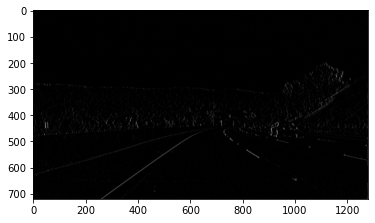

In [12]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y_decimal = np.array([[ -0.5, -0.9, -0.5], 
                   [ 0, 0, 0], 
                   [0.5, 0.9, 0.5]])

## TODO: Create and apply a Sobel x operator
sobel_x_decimal = np.array([[-0.5, 0, 0.5],
                   [-0.9, 0, 0.9],
                   [-0.5, 0, 0.5]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_decimal = cv2.filter2D(gray, -1, sobel_y_decimal)
filtered_image_decimal = cv2.filter2D(gray, -1, sobel_x_decimal)

plt.imshow(filtered_image_decimal, cmap='gray')

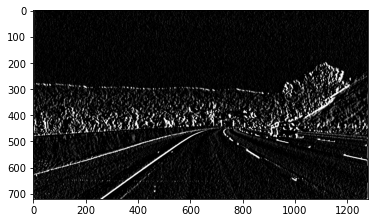

In [13]:
# Create a custom kernel

# 5x5 array for edge detection
sobel_y_5 = np.array([[-1, -2, -5, -2, -1],
                      [-0.5, -1, -1.5, -1, -0.5],
                      [0, 0, 0, 0, 0],
                      [0.5, 1, 1.5, 1, 0.5],
                      [1, 2, 5, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x_5 = np.array([[-1, -0.5, 0, 0.5, 1],
                      [-2, -1, 0, 1, 2],
                      [-5, -1.5, 0, 1.5, 5],
                      [-2, -1, 0, 1, 2],
                      [-1, -0.5, 0, 0.5, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

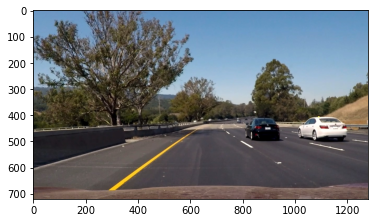

In [15]:
# Read in the image
image_trees = mpimg.imread('assets/bridge_trees_example.jpg')

plt.imshow(image)

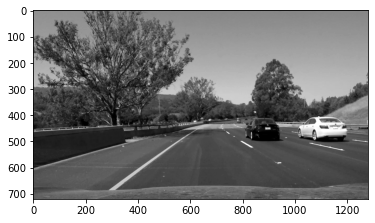

In [16]:
# Convert to grayscale for filtering
gray_trees = cv2.cvtColor(image_trees, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_trees, cmap='gray')

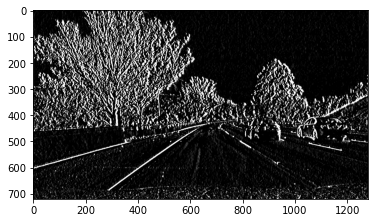

In [17]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray_trees, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray_trees, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

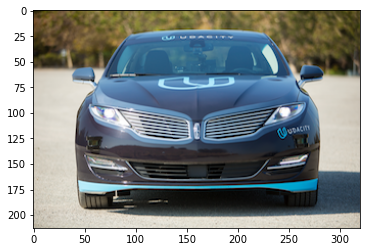

In [20]:
# Read in the image
image_car = mpimg.imread('assets/udacity_sdc.png')

plt.imshow(image_car)

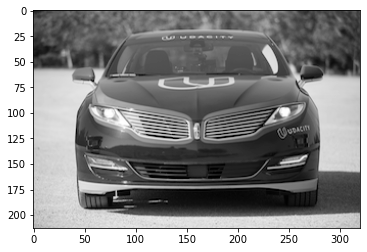

In [21]:
# Convert to grayscale for filtering
gray_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_car, cmap='gray')

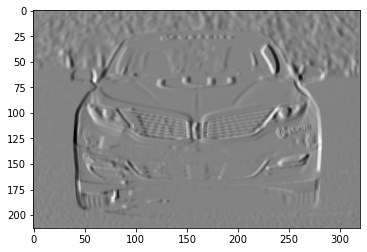

In [22]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_5 = cv2.filter2D(gray_car, -1, sobel_y_5)
filtered_image_5 = cv2.filter2D(gray_car, -1, sobel_x_5)

plt.imshow(filtered_image_5, cmap='gray')

## The importance of filters 

What we have just learned about different types of filters will be really important as we progress on deep learning, especially with CNNs. CNNs are a kind of deep learning model that can learn to do things like image classification and object recognition. They keep track of spatial information and learn to extract features like the edges of objects in something called a **convolutional layer**. Below we will see an simple CNN structure, made of multiple layers, below, including this "convolutional layer":

<img src="assets/LayersInCNNs.png">

## Convolutional layer

The convolutional layer is produced by applying a series of many different image filters, also known as convolutional kernels, to an input image. 

<img src="assets/4kernelsImage.png">

In the example shown, 4 different filters produce 4 differently filtered output images. When we stack these images, we form a complete convolutional layer with a depth of 4!

<img src="assets/AConvolutionalLayer.png">

## Learning

In the code above, we have been setting the values of filter weights explicitly, but neural networks will actually learn the best filter weights as they train on a set of image data. We will learn all about this type of neural network later, but know that high-pass and low-pass filters are what define the behavior of a network like this, and we know how to code those from scratch.

In practice, we will also find that many neural networks learn to detect the edges of images because the edges of object contain valuable information about the shape of an object.

Let's consider the image of a dog like this:

<img src="assets/Dog.png">

A single region in the image may have many different patterns that we want to detect. Consider the region of the dog's mouth for instance, that region has teeth, some whiskers, and a tongue. In that case, to understand this image we neeed filters for detecting all three of these characteristics. One for each of teeth, whiskers, and tongue. 

Recall the case of a single convolutional filter, adding another filter is probably exactly what we would expect. Where we just populate an additional collection of nodes in the convolutional layer. That collection has its own shared set of weights that differ from the weights for the first nodes. In fact, is common to have tens to hundreds of these collections in a convolutional layer, each corresponding to their own filter. Let's now execute some code to see what these collections look like. After all, each is formatted in the same way as an image, neamely as a matrix of values. 

# Convolutional Layer

We will visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer. 

In this example, *we* are defining four filters that are applied to an input image by initializing the **weights** of a convolutional layer, but a trained CNN will learn the values of these weights.

<img src='assets/conv_layer.gif' height=60% width=60% />